In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


In [4]:
df_raw = pd.read_excel("dataset.xlsx",sheet_name = 1,skiprows=1,usecols=("A:J"),engine='openpyxl')


#rename columns
df_raw.rename(columns={'B (m)':'B','q (kPa)':'q','Sm (mm)':'sm','Sp (mm)':'sp','Unnamed: 9':'mayerhoff'},inplace = True)
#drop unnecessary  rows/columns
df_raw = df_raw.drop(0)
col_drop = [0,8]
df_raw = df_raw.drop(df_raw.columns[col_drop],axis = 1)


In [3]:
X = [0,1,2,3,4]
y = [5]
#splitting dataset
X_train = df_raw.iloc[:121,X]
X_test = df_raw.iloc[121:152,X]
y_train = df_raw.iloc[:121,y]
y_test = df_raw.iloc[121:152,y]
mayerhoff = df_raw.iloc[121:152,7]


# Linear Regression


In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#fit model
reg.fit(X_train,y_train)
reg_pred = reg.predict(X_test)


In [5]:
def accuracy (test, pred):
    r2 = r2_score(test,pred)
    rmse= sqrt(mean_squared_error(test,pred))
    mae = mean_absolute_error(test,pred)
    val = f'R2: {r2:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}'
    return val

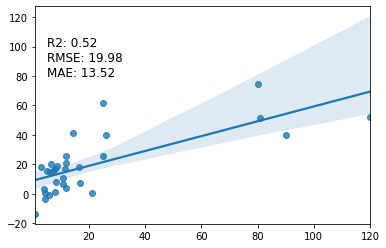

In [6]:
plt.text(5,80,accuracy(y_test,reg_pred),fontsize= 12)
sns.regplot(x= y_test.values.flatten(),y = reg_pred.reshape(-1))

# Tree Regressor

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
tree_pred = regressor.predict(X_test)

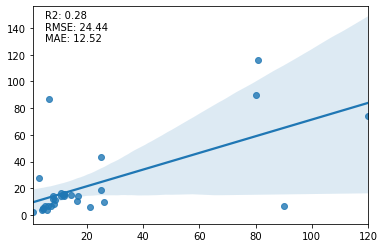

In [8]:
plt.text(5,130,accuracy(y_test,tree_pred))
sns.regplot(x= y_test.values.flatten(),y= tree_pred.reshape(-1))

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train.values.flatten())
rfr_pred = rfr.predict(X_test)

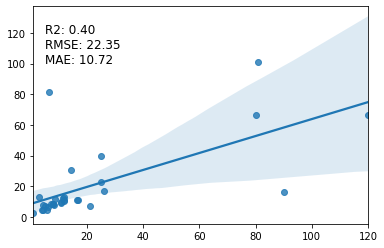

In [10]:
plt.text(5,100,accuracy(y_test,rfr_pred), fontsize= 12)
sns.regplot(x= y_test.values.flatten(),y= rfr_pred.reshape(-1))

# CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
cnn = Sequential()

cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(1))

cnn.compile(optimizer='adam',loss='mse')

In [12]:
cnn.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=200,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 497ms/step - loss: 2477.7234 - val_loss: 2477.8625
Epoch 2/500
1/1 [==============================] - 0s 23ms/step - loss: 2276.7659 - val_loss: 2285.9392
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 2091.5796 - val_loss: 2110.7683
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 1921.9420 - val_loss: 1951.1360
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 1768.2930 - val_loss: 1810.7947
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 1633.7588 - val_loss: 1686.8640
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 1514.7046 - val_loss: 1583.8427
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 1415.6696 - val_loss: 1500.1552
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 1332.3674 - val_loss: 1426.6154
Epoch 10/500
1/1 [==============================] - 0s 20ms/ste

1/1 [==============================] - 0s 16ms/step - loss: 773.4412 - val_loss: 906.9237
Epoch 81/500
1/1 [==============================] - 0s 16ms/step - loss: 771.5950 - val_loss: 904.5471
Epoch 82/500
1/1 [==============================] - 0s 16ms/step - loss: 769.7114 - val_loss: 902.1286
Epoch 83/500
1/1 [==============================] - 0s 16ms/step - loss: 767.8187 - val_loss: 899.6631
Epoch 84/500
1/1 [==============================] - 0s 16ms/step - loss: 765.9011 - val_loss: 897.1554
Epoch 85/500
1/1 [==============================] - 0s 17ms/step - loss: 763.9509 - val_loss: 894.6129
Epoch 86/500
1/1 [==============================] - 0s 17ms/step - loss: 761.9597 - val_loss: 892.0281
Epoch 87/500
1/1 [==============================] - 0s 16ms/step - loss: 759.9267 - val_loss: 889.4043
Epoch 88/500
1/1 [==============================] - 0s 16ms/step - loss: 757.8531 - val_loss: 886.7474
Epoch 89/500
1/1 [==============================] - 0s 17ms/step - loss: 755.7602 - va

1/1 [==============================] - 0s 19ms/step - loss: 538.9703 - val_loss: 633.3601
Epoch 160/500
1/1 [==============================] - 0s 17ms/step - loss: 535.3621 - val_loss: 629.8615
Epoch 161/500
1/1 [==============================] - 0s 18ms/step - loss: 531.8505 - val_loss: 626.4449
Epoch 162/500
1/1 [==============================] - 0s 17ms/step - loss: 528.3361 - val_loss: 623.0887
Epoch 163/500
1/1 [==============================] - 0s 16ms/step - loss: 524.8359 - val_loss: 619.7819
Epoch 164/500
1/1 [==============================] - 0s 18ms/step - loss: 521.3459 - val_loss: 616.5289
Epoch 165/500
1/1 [==============================] - 0s 16ms/step - loss: 517.8844 - val_loss: 613.3264
Epoch 166/500
1/1 [==============================] - 0s 16ms/step - loss: 514.4528 - val_loss: 610.1570
Epoch 167/500
1/1 [==============================] - 0s 18ms/step - loss: 511.0398 - val_loss: 607.0309
Epoch 168/500
1/1 [==============================] - 0s 28ms/step - loss: 507.

Epoch 238/500
1/1 [==============================] - 0s 26ms/step - loss: 342.7255 - val_loss: 439.1536
Epoch 239/500
1/1 [==============================] - 0s 19ms/step - loss: 340.9446 - val_loss: 436.3275
Epoch 240/500
1/1 [==============================] - 0s 16ms/step - loss: 339.2143 - val_loss: 433.5381
Epoch 241/500
1/1 [==============================] - 0s 16ms/step - loss: 337.5743 - val_loss: 430.7259
Epoch 242/500
1/1 [==============================] - 0s 16ms/step - loss: 336.0005 - val_loss: 427.9415
Epoch 243/500
1/1 [==============================] - 0s 16ms/step - loss: 334.4446 - val_loss: 425.2430
Epoch 244/500
1/1 [==============================] - 0s 18ms/step - loss: 332.8316 - val_loss: 422.6231
Epoch 245/500
1/1 [==============================] - 0s 19ms/step - loss: 331.2510 - val_loss: 420.2786
Epoch 246/500
1/1 [==============================] - 0s 18ms/step - loss: 329.6570 - val_loss: 417.9097
Epoch 247/500
1/1 [==============================] - 0s 17ms/ste

Epoch 317/500
1/1 [==============================] - 0s 19ms/step - loss: 222.3478 - val_loss: 297.3088
Epoch 318/500
1/1 [==============================] - 0s 18ms/step - loss: 220.9571 - val_loss: 296.1651
Epoch 319/500
1/1 [==============================] - 0s 17ms/step - loss: 219.5848 - val_loss: 294.9412
Epoch 320/500
1/1 [==============================] - 0s 18ms/step - loss: 218.2090 - val_loss: 293.6498
Epoch 321/500
1/1 [==============================] - 0s 18ms/step - loss: 216.8206 - val_loss: 292.3235
Epoch 322/500
1/1 [==============================] - 0s 17ms/step - loss: 215.4331 - val_loss: 291.0544
Epoch 323/500
1/1 [==============================] - 0s 16ms/step - loss: 214.0614 - val_loss: 289.8389
Epoch 324/500
1/1 [==============================] - 0s 16ms/step - loss: 212.6862 - val_loss: 288.5226
Epoch 325/500
1/1 [==============================] - 0s 21ms/step - loss: 211.3002 - val_loss: 287.2127
Epoch 326/500
1/1 [==============================] - 0s 17ms/ste

Epoch 396/500
1/1 [==============================] - 0s 19ms/step - loss: 134.9621 - val_loss: 226.2089
Epoch 397/500
1/1 [==============================] - 0s 16ms/step - loss: 134.2807 - val_loss: 225.2807
Epoch 398/500
1/1 [==============================] - 0s 19ms/step - loss: 133.6183 - val_loss: 224.2923
Epoch 399/500
1/1 [==============================] - 0s 17ms/step - loss: 133.0604 - val_loss: 224.4866
Epoch 400/500
1/1 [==============================] - 0s 16ms/step - loss: 132.3748 - val_loss: 224.4060
Epoch 401/500
1/1 [==============================] - 0s 17ms/step - loss: 131.7566 - val_loss: 223.5236
Epoch 402/500
1/1 [==============================] - 0s 15ms/step - loss: 131.2303 - val_loss: 223.6008
Epoch 403/500
1/1 [==============================] - 0s 16ms/step - loss: 130.6074 - val_loss: 224.3773
Epoch 404/500
1/1 [==============================] - 0s 18ms/step - loss: 130.0352 - val_loss: 223.9880
Epoch 405/500
1/1 [==============================] - 0s 16ms/ste

Epoch 475/500
1/1 [==============================] - 0s 16ms/step - loss: 109.8855 - val_loss: 210.4547
Epoch 476/500
1/1 [==============================] - 0s 15ms/step - loss: 109.7427 - val_loss: 210.2926
Epoch 477/500
1/1 [==============================] - 0s 15ms/step - loss: 109.5688 - val_loss: 210.1371
Epoch 478/500
1/1 [==============================] - 0s 16ms/step - loss: 109.4610 - val_loss: 210.2610
Epoch 479/500
1/1 [==============================] - 0s 15ms/step - loss: 109.3075 - val_loss: 210.3822
Epoch 480/500
1/1 [==============================] - 0s 15ms/step - loss: 109.1741 - val_loss: 210.2454
Epoch 481/500
1/1 [==============================] - 0s 17ms/step - loss: 109.0312 - val_loss: 209.7816
Epoch 482/500
1/1 [==============================] - 0s 17ms/step - loss: 108.8805 - val_loss: 209.5270
Epoch 483/500
1/1 [==============================] - 0s 17ms/step - loss: 108.7555 - val_loss: 209.5056
Epoch 484/500
1/1 [==============================] - 0s 18ms/ste

In [13]:
cnn_pred = cnn.predict(X_test)

In [14]:
accuracy(y_test,cnn_pred)

'R2: 0.75\nRMSE: 14.44\nMAE: 7.78'

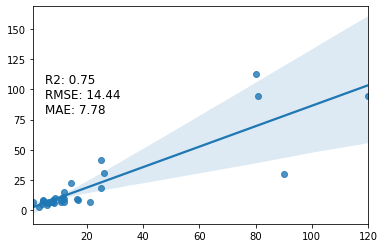

In [15]:
plt.text(5,80,accuracy(y_test,cnn_pred),fontsize= 12)
sns.regplot(x= y_test.values.flatten(),y= cnn_pred.reshape(-1))